In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path_superstore = '/content/drive/MyDrive/dataset/Kaggle/Sample - Superstore.csv'
file_path_churn = '/content/drive/MyDrive/dataset/Kaggle/WA_Fn-UseC_-Telco-Customer-Churn.csv'


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load the Superstore dataset
df = pd.read_csv(file_path_superstore, encoding='latin1')

# Features and target variable
X = df[['Discount', 'Quantity']]
y = df['Sales']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'LR MSE: {mse}')
print(f'LR R-squared: {r2}')

LR MSE: 569282.568307617
LR R-squared: 0.03625634814946299


In [4]:
from sklearn.linear_model import Ridge

# Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions and evaluate
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

print(f'Ridge MSE: {ridge_mse}')
print(f'Ridge R-squared: {ridge_r2}')

Ridge MSE: 569276.6414239712
Ridge R-squared: 0.0362663818248411


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Load the Telco Customer Churn dataset
df = pd.read_csv(file_path_churn)

# Convert categorical variables to numerical
df['gender'] = df['gender'].astype('category').cat.codes
df['Partner'] = df['Partner'].astype('category').cat.codes
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convert 'TotalCharges' to numeric, handling errors by dropping rows
# some values are empty string, therefore we need to drop these rows.
df = df[pd.to_numeric(df['TotalCharges'], errors='coerce').notnull()]
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Features and target
X = df[['MonthlyCharges', 'tenure', 'TotalCharges']]
y = df['Churn']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions and evaluate
predictions = log_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'LR Accuracy: {accuracy}')
print(f'LR Precision: {precision}')
print(f'LR Recall: {recall}')
print(f'LR F1 Score: {f1}')

LR Accuracy: 0.7796730632551528
LR Precision: 0.625
LR Recall: 0.42780748663101603
LR F1 Score: 0.5079365079365079


<ipython-input-5-806f2a6f87cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])


In [6]:
from sklearn.ensemble import RandomForestClassifier

# Build Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print(f'RF Accuracy: {rf_accuracy}')
print(f'RF Precision: {rf_precision}')
print(f'RF Recall: {rf_recall}')
print(f'RF F1 Score: {rf_f1}')

RF Accuracy: 0.7590618336886994
RF Precision: 0.625
RF Recall: 0.4197860962566845
RF F1 Score: 0.48085758039816234


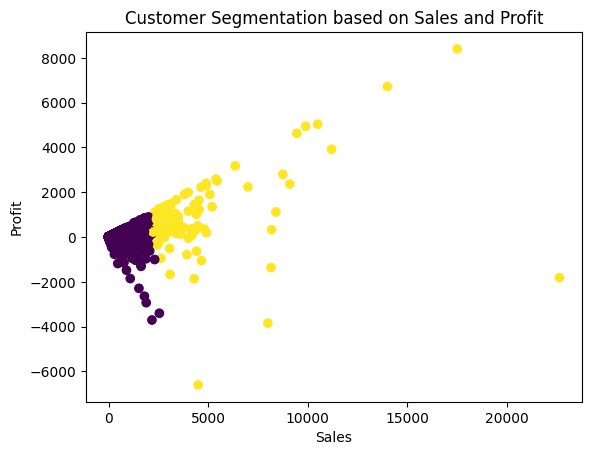

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Load the Superstore dataset
df = pd.read_csv(file_path_superstore, encoding='latin1')

# Features for clustering
X = df[['Sales', 'Profit']]

# Build K-Means model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Visualize clusters
plt.scatter(df['Sales'], df['Profit'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Customer Segmentation based on Sales and Profit')
plt.show()

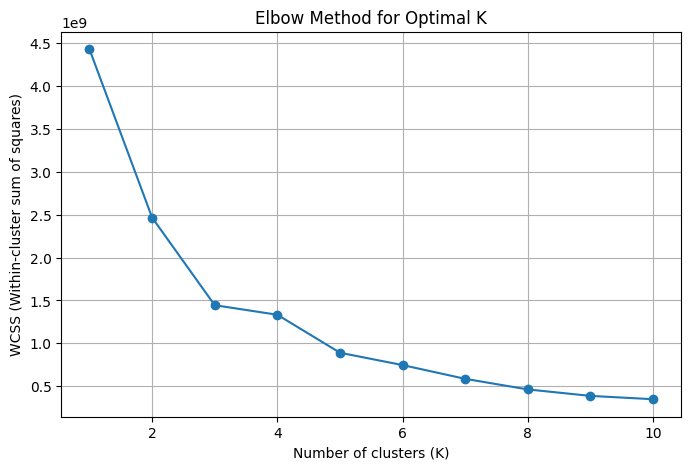

In [9]:
# Elbow Method to determine the optimal number of clusters
wcss = []
K_range = range(1, 11)

# Calculate WCSS for each value of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.grid(True)
plt.show()

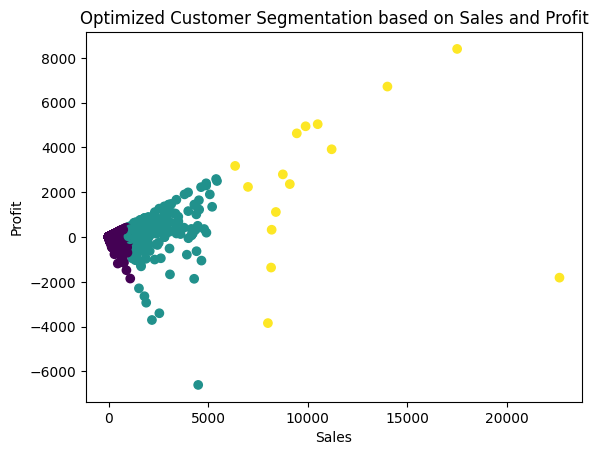

In [10]:
# Applying K-Means with the optimal number of clusters
optimal_k = 3  # Assuming the elbow method indicated 3 clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X)

# Add the new cluster labels to the DataFrame
df['Optimal_Cluster'] = kmeans_optimal.labels_

# Visualize the optimized clusters
plt.scatter(df['Sales'], df['Profit'], c=df['Optimal_Cluster'], cmap='viridis')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Optimized Customer Segmentation based on Sales and Profit')
plt.show()